In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
minMax = (  #from data creation
            (0.0005, 0.01),
            (0.1, 1),
            (50, 1000),
            (0.001, 0.01),
        )

dataset = np.load("data/dataset32.npz")
coh = dataset['coh']
par = dataset['par'][:,:-1]

for i in range(par.shape[1]):
    par[:,i] -= minMax[i][0]
    par[:,i] /= minMax[i][1] - minMax[i][0]

In [3]:
par.shape

(2560000, 4)

In [4]:
def plotValues(values=[0,0,0,0], indexes=False):
    if len(values) != 4:
        raise Exception("Wrong length")
    if indexes:
        index = values
    else:
        if min(values) < 0 or max(values) > 1:
            raise Exception("Wrong values")
        index = [round(v*39) for v in values]
    calcBase = index[3] + index[2]*40 + index[1]*40*40 + index[0]*40*40*40
    plt.plot(coh[calcBase], label="[{:.2f}, {:.2f}, {:.2f}, {:.2f}]".format(*par[calcBase]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    plt.xlabel(r'$t_1 \; [\mu{\rm s}]$',fontsize=14)
    plt.ylabel(r'$C(t)$',fontsize=14)
    plt.ylim(bottom=-0.05)
    plt.show()


In [5]:
def plotRange(index, base=[0,0,0,0], jump=1):
    if len(base) == 3:
        base.insert(index, 0)
    elif len(base) == 4:
        base[index] = 0
    else:
        raise Exception("Use length 3 or 4")
    calcBase = base[3] + base[2]*40 + base[1]*40*40 + base[0]*40*40*40
    for i in range(calcBase, 40**(4-index) + calcBase, jump*40**(4-index-1)):
        plt.plot(coh[i], label="[{:.2f}, {:.2f}, {:.2f}, {:.2f}]".format(*par[i]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2 if jump<=2 else 1)
    plt.xlabel(r'$t_1 \; [\mu{\rm s}]$',fontsize=14)
    plt.ylabel(r'$C(t)$',fontsize=14)
    plt.ylim(bottom=-0.05)
    plt.show()

### Plot syntetic data

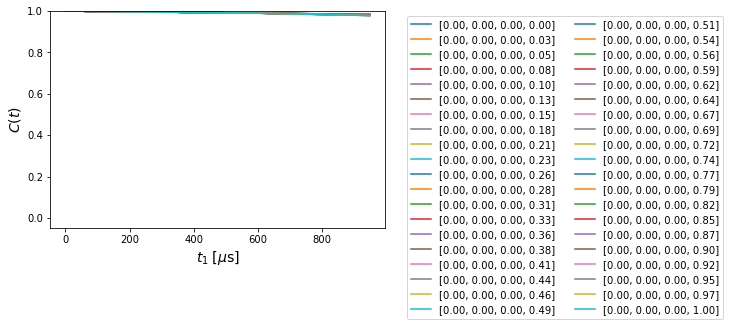

In [6]:
plotRange(3)

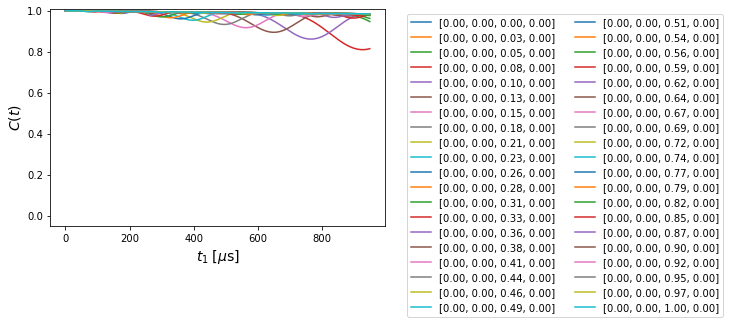

In [7]:
plotRange(2)

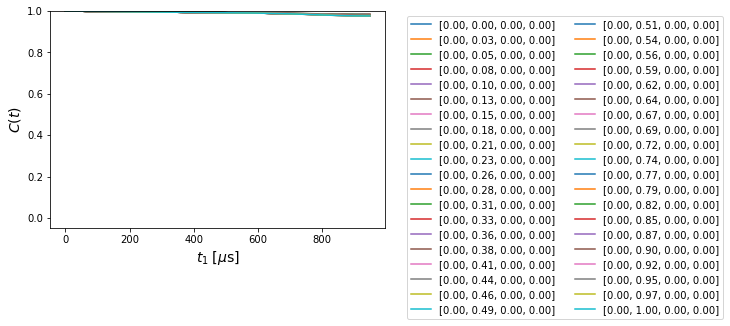

In [8]:
plotRange(1)

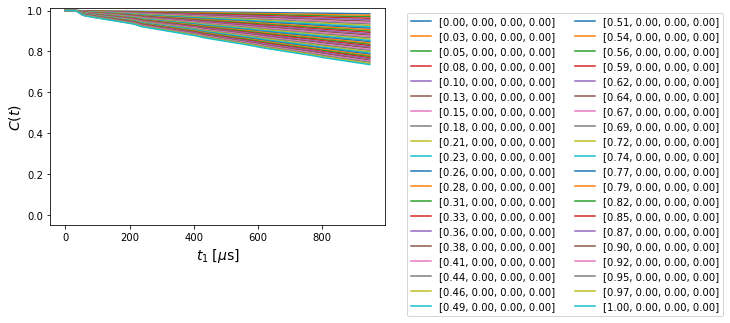

In [9]:
plotRange(0)

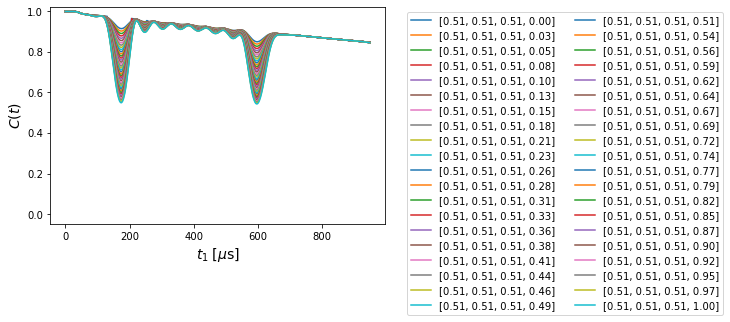

In [10]:
plotRange(3, base=[20,20,20,20])

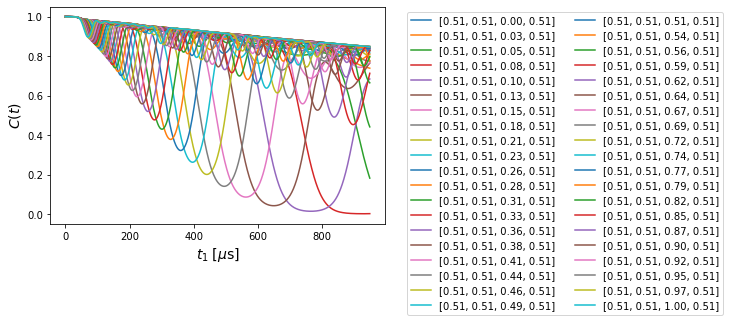

In [11]:
plotRange(2, base=[20,20,20,20])

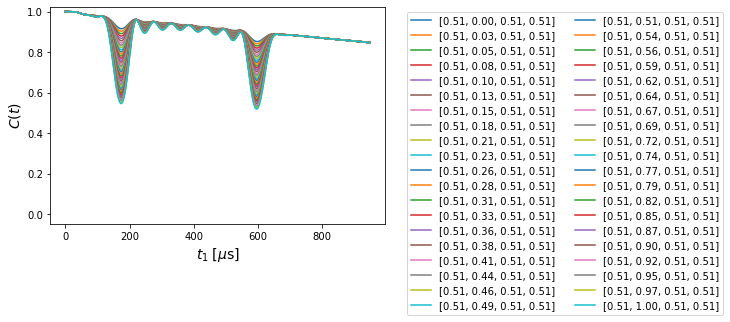

In [12]:
plotRange(1, base=[20,20,20,20])

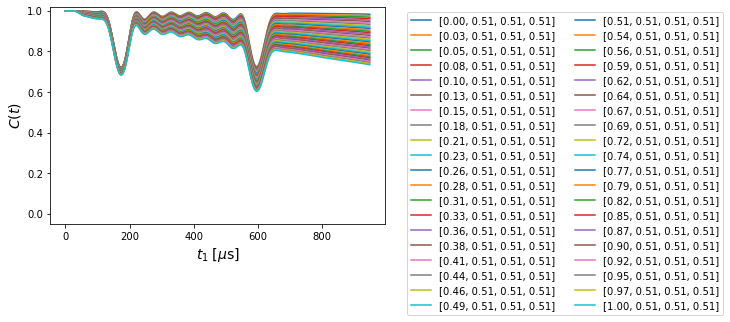

In [13]:
plotRange(0, base=[20,20,20,20])


### Plot real data as predicted by MLP

In [14]:
p = np.load("files/config2/predictions/best-465-all.npz")
pred = p['pred']

In [15]:
pred

array([[1.3502258e-19, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [6.5007835e-09, 1.0000000e+00, 6.9236957e-34, 0.0000000e+00],
       [1.3899717e-10, 1.0000000e+00, 0.0000000e+00, 2.1290161e-32]],
      dtype=float32)

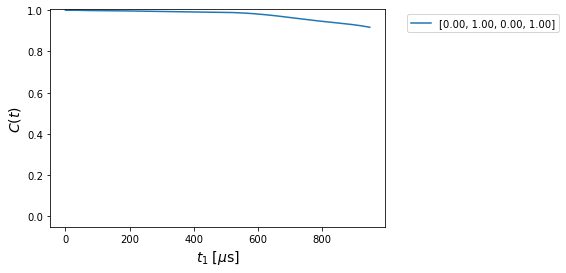

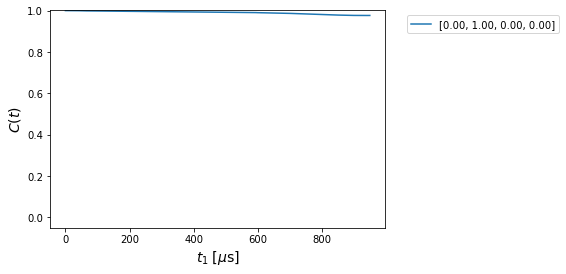

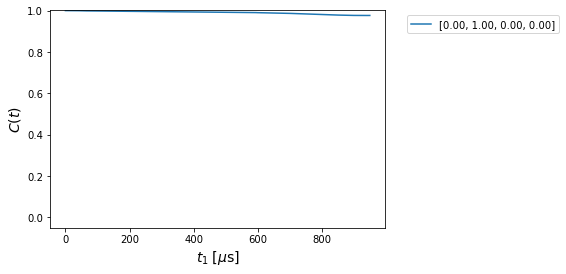

In [16]:
for i in range(len(pred)):
    plotValues(pred[i])


### Plot real data as predicted by CNN

In [17]:
p = np.load("files/configCNN1/predictions/best-76-all.npz")
pred = p['pred']

In [18]:
pred

array([[0.89572316, 1.        , 0.7133549 , 1.        ],
       [0.00184395, 0.9999999 , 0.27521327, 1.        ],
       [1.        , 1.        , 0.31287414, 1.        ]], dtype=float32)

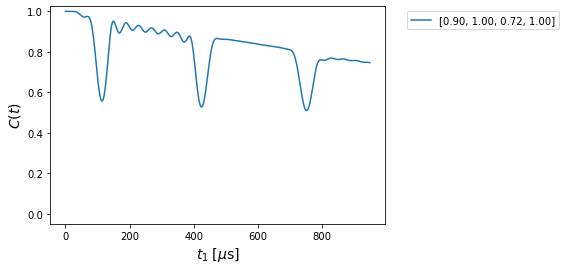

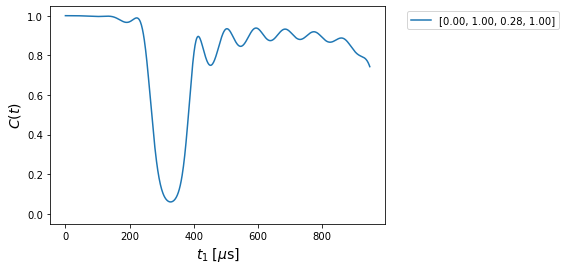

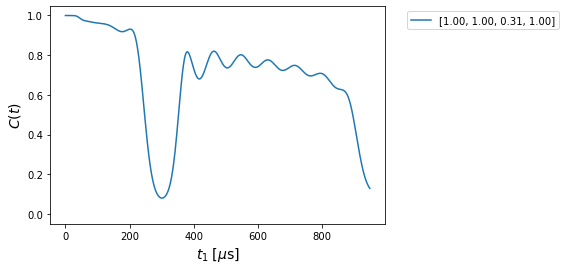

In [19]:
for i in range(len(pred)):
    plotValues(pred[i])
